class_weight balanced y SMOTE

***Arrhythmia on ECG Classification***

In [1]:
# importar las librerias:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
from imblearn.over_sampling import SMOTE
import imblearn
#!pip install imbalanced-learn

warnings.filterwarnings('ignore')


In [2]:
# carga de los dataset:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [3]:
# Dataset desbalanceados: 
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]

In [4]:
X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(87554, 187)
(87554,)
(21892, 187)
(21892,)


**1.Random Forest**

***1.2 RF SMOTE datos Totales***

In [6]:
# “SMOTE: Synthetic Minority Over-sampling Technique.” used for oversampling
# Note : El sobremuestreo solo en los datos de train, nunca en los datos de test
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)

In [7]:
y_oversampled.value_counts()


1.0    72471
3.0    72471
4.0    72471
2.0    72471
0.0    72471
Name: 187, dtype: int64

In [10]:
# Entrenamiento del modelo luego de SMOTE
rf_smote_resampled=RandomForestClassifier()

In [11]:
rf_smote_resampled.fit(X_oversampled,y_oversampled)
y_pred=rf_smote_resampled.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.9809976247030879

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.88      0.76      0.82       556
         2.0       0.97      0.94      0.95      1448
         3.0       0.82      0.77      0.79       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.93      0.89      0.91     21892
weighted avg       0.98      0.98      0.98     21892



In [12]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)


In [15]:
import pickle
# Save the model as a pickle
import pickle
filename = './modelos/rf_smote_resampled.pkl'
pickle.dump(rf_smote_resampled, open(filename, 'wb'))


Normalized confusion matrix


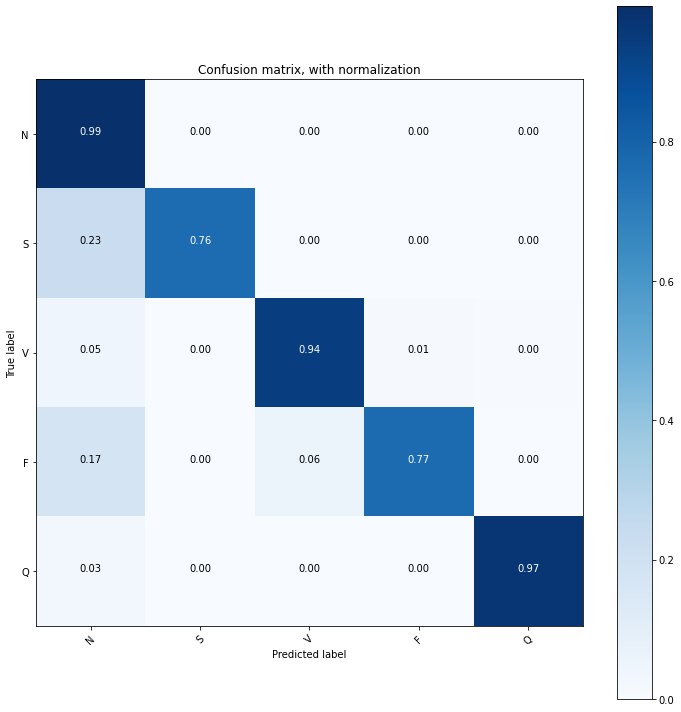

In [14]:
# matriz de confución normalizada:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
